In [1]:
# DS Modules
import numpy as np
import pandas as pd

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# Helpers
import helpers
import acquire

In [2]:
df = acquire.both_get_data()
df.columns = [helpers.util.make_valid_py_id(col) for col in df]
df = df.reset_index().drop(columns='index')
train, test , validate = helpers.prep.train_test_validate_split(df)

In [16]:
class FlavorProfile:

    def __init__(self, **kwargs):
        defaultKwargs = {
            'features' : ['volatile_acidity','chlorides','residual_sugar','alcohol'],
            'random_state': 8,
            'k' : 4
        }
        kwargs = { **defaultKwargs, **kwargs }
        
        self.features = kwargs['features']
        self.random_state = kwargs['random_state']
        self.n_clusters = kwargs['k']
    
    def fit(self, train):
        self.train = train
        self.fit_scaler()
        self.fit_clusterer()
        return self

    def fit_scaler(self):
        self.scaler = helpers.prep.train_scaler(self.train[self.features])
        self.scaled_train = self.train.copy()
        self.scaled_train[self.features] = self.scaler.transform(self.train[self.features])

    def fit_clusterer(self):
        self.clusterer = helpers.cluster.build_kmeans_clusterer(df=self.scaled_train, cols=self.features, k=self.n_clusters, random_state=self.random_state)

    def predict(self, df):
        temp_df = df.copy()
        temp_df[self.features] = self.scaler.transform(temp_df[self.features])
        y = self.clusterer.predict(temp_df[self.features])
        return y


In [17]:
from model import FlavorProfile

flavor = FlavorProfile()
flavor.fit(train)

train['flavor_profile'] = flavor.predict(train)
test['flavor_profile'] = flavor.predict(test)
validate['flavor_profile'] = flavor.predict(validate)

[Text(0.5, 1.0, 'both')]

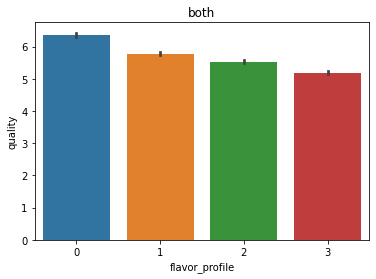

In [20]:
sns.barplot(data= train, x='flavor_profile', y='quality').set(title='both')

In [1]:
# DS Modules
import numpy as np
import pandas as pd

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# Helpers
import helpers
import acquire

df = acquire.both_get_data()
df.columns = [helpers.util.make_valid_py_id(col) for col in df]
df = df.reset_index().drop(columns='index')
train, test , validate = helpers.prep.train_test_validate_split(df)

from model import FlavorProfile

flavor = FlavorProfile()
flavor.fit(train)

train['flavor_profile'] = flavor.predict(train)
test['flavor_profile'] = flavor.predict(test)
validate['flavor_profile'] = flavor.predict(validate)

[Text(0.5, 1.0, 'both')]

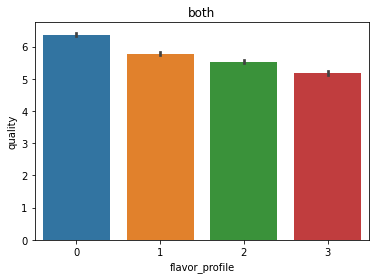

In [2]:
sns.barplot(data= train, x='flavor_profile', y='quality').set(title='both')